In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# yfinance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2015-01-01'
end = '2020-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-12-31,28.205000,28.282499,27.552500,27.594999,25.137676,165613600
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.898552,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,24.197117,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,24.199400,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.538729,160423600


In [3]:
df['MF Multiplier'] = (2*df['Adj Close'] - df['Low'] - df['High'])/(df['High']-df['Low'])
df['MF Volume'] = df['MF Multiplier']*df['Volume']
df['ADL'] = df['MF Volume'].cumsum()
df = df.drop(['MF Multiplier','MF Volume'],axis=1)

No handles with labels found to put in legend.


Text(0.5, 0, 'Date')

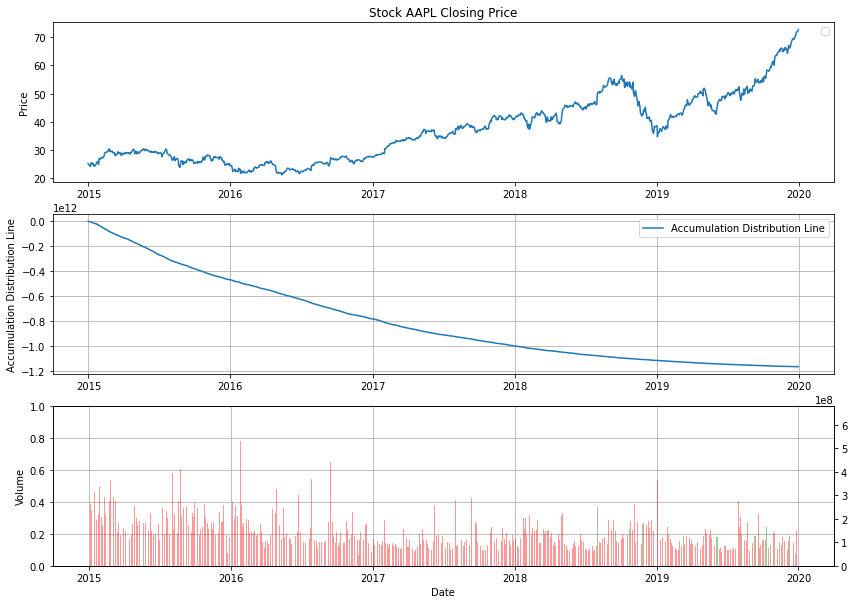

In [4]:
df['VolumePositive'] = df['Open'] < df['Adj Close']
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(3, 1, 1)
ax1.plot(df['Adj Close'])
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')
ax1.legend(loc='best')

ax2 = plt.subplot(3, 1, 2)
ax2.plot(df['ADL'], label='Accumulation Distribution Line')
ax2.grid()
ax2.legend(loc='best')
ax2.set_ylabel('Accumulation Distribution Line')

ax3 = plt.subplot(3, 1, 3)
ax3v = ax3.twinx()
colors = df.VolumePositive.map({True: 'g', False: 'r'})
ax3v.bar(df.index, df['Volume'], color=colors, alpha=0.4)
ax3.set_ylabel('Volume')
ax3.grid()
ax3.set_xlabel('Date')